In [1]:
#DATASETS:  https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
#DATASET DESCRIPTION: https://zenodo.org/records/4446043#.ZEV8d-zMI-R

In [2]:
#Let's start by importing all packages needed.
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
#Load the datasets.
df_am1 = pd.read_csv('~/Downloads/DAA/archive/amsterdam_weekdays.csv')
df_am2 = pd.read_csv('~/Downloads/DAA/archive/amsterdam_weekends.csv')

df_at1 = pd.read_csv('~/Downloads/DAA/archive/athens_weekdays.csv')
df_at2 = pd.read_csv('~/Downloads/DAA/archive/athens_weekends.csv')

df_ba1 = pd.read_csv('~/Downloads/DAA/archive/barcelona_weekdays.csv')
df_ba2 = pd.read_csv('~/Downloads/DAA/archive/barcelona_weekends.csv')

df_be1 = pd.read_csv('~/Downloads/DAA/archive/berlin_weekdays.csv')
df_be2 = pd.read_csv('~/Downloads/DAA/archive/berlin_weekends.csv')

df_bu1 = pd.read_csv('~/Downloads/DAA/archive/budapest_weekdays.csv')
df_bu2 = pd.read_csv('~/Downloads/DAA/archive/budapest_weekends.csv')

df_li1 = pd.read_csv('~/Downloads/DAA/archive/lisbon_weekdays.csv')
df_li2 = pd.read_csv('~/Downloads/DAA/archive/lisbon_weekends.csv')

df_lo1 = pd.read_csv('~/Downloads/DAA/archive/london_weekdays.csv')
df_lo2 = pd.read_csv('~/Downloads/DAA/archive/london_weekends.csv')

df_pa1 = pd.read_csv('~/Downloads/DAA/archive/paris_weekdays.csv')
df_pa2 = pd.read_csv('~/Downloads/DAA/archive/paris_weekends.csv')

df_ro1 = pd.read_csv('~/Downloads/DAA/archive/rome_weekdays.csv')
df_ro2 = pd.read_csv('~/Downloads/DAA/archive/rome_weekends.csv')

df_vi1 = pd.read_csv('~/Downloads/DAA/archive/vienna_weekdays.csv')
df_vi2 = pd.read_csv('~/Downloads/DAA/archive/vienna_weekends.csv')

In [4]:
# -------------------------------------------------------------------------
#The following section will be the data processing of the city 'Amsterdam'.

In [5]:
print(df_am1.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [6]:
print(df_am2.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [7]:
#Add a new column with the identifier of data ("Weekend or Weekday").
df_am1["dataType"] = "Weekday"
df_am2["dataType"] = "Weekend"

In [8]:
#Append the two datasets.
df_am = df_am1._append(df_am2,ignore_index=True)

In [9]:
#Quick sneak peek into the data.
#Tehe.
df_am.head()
#Yeah, things seem to be ok on this end.

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,dataType
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Weekday
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Weekday
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Weekday
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Weekday
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Weekday


In [10]:
#Now we want to round up two specific columns: 'dist' and 'metro_dist'.
#At the moment we need to disclose that this is the second version of data processing we are doing
#as there was a previous attempt that was botched since graphic making was nearly impossible
#due to the dataset formating.
#For disclosure, the previous version consisted of merging (inner join) the two amsterdam datasets and keeping
#basically all data with the difference that columns from the weekend dataset had a "_we" in their label at the end
#and columns from the weekday dataset had a "_wd" in its place.
#....With this said....
#We had previously studied how best to round up 'dist' and 'metro_dist' in a way that they were equal for units
#with the exact same lat and lng (latitude and longitude - aka coordenates).
#The minimal round up digit we could do to get these two datasets to match in the same airbnbs was 1

#For reference, these are the lines we used to round and compare the results:
#
#       df_amsterdam['metro_dist_we'] = df_amsterdam['metro_dist_we'].round(decimals = 1)  #1 decimal because it's the only way to mitigate the errors commited
#       df_amsterdam['metro_dist_wd'] = df_amsterdam['metro_dist_wd'].round(decimals = 1)
#       print(df_amsterdam['metro_dist_we'].equals(df_amsterdam['metro_dist_wd']))
#       df_temp = df_amsterdam[['metro_dist_we', 'metro_dist_wd']]
#       df_temp.query('metro_dist_we != metro_dist_wd')

In [ ]:
#We must also disclose that the entire premisse for this action is the knowledge we gained previously by
#comparing df_amsterdam['metro_dist_we'] and df_amsterdam['metro_dist_wd'], where we found discrepancies in the
#numbers. At this point, with the appended datasets as they are, the verification of errors would be much more
#difficult right now, and we already know of their existance and how to mitigate them, so we're just going
#to correct them directly.

#For reference, these are the lines we used to detect errors between columns:
#
#       print(df_amsterdam['metro_dist_we'].equals(df_amsterdam['metro_dist_wd']))
#       df_temp = df_amsterdam[['metro_dist_we', 'metro_dist_wd']]
#       df_temp.query('metro_dist_we != metro_dist_wd')
#       #distance is different in all rows between the datasets?

In [11]:
df_am['dist'] = df_am['dist'].round(decimals = 1)
df_am['metro_dist'] = df_am['metro_dist'].round(decimals = 1)

In [12]:
df_am.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,dataType
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,1,5.0,2.5,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Weekday
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,1,0.5,0.2,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Weekday
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,1,5.7,3.7,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Weekday
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,2,0.4,0.4,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Weekday
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.5,0.3,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Weekday


In [13]:
#Checking if there occured any null values originated from the append
df_am.isna().any()

Unnamed: 0                    False
realSum                       False
room_type                     False
room_shared                   False
room_private                  False
person_capacity               False
host_is_superhost             False
multi                         False
biz                           False
cleanliness_rating            False
guest_satisfaction_overall    False
bedrooms                      False
dist                          False
metro_dist                    False
attr_index                    False
attr_index_norm               False
rest_index                    False
rest_index_norm               False
lng                           False
lat                           False
dataType                      False
dtype: bool

In [14]:
#That column 'Unnamed: 0' is completely unnecessary, as it appears to be a previous index of rows of the datasets.
#Right now, it is simply a hindrance - we must exclude it from our data.
df_am = df_am.drop(['Unnamed: 0'], axis=1)
print(df_am.columns)

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'dataType'],
      dtype='object')


In [15]:
#Ok, let's just check if the dataType column is categorical (since it is important for later).
df_am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     2080 non-null   float64
 1   room_type                   2080 non-null   object 
 2   room_shared                 2080 non-null   bool   
 3   room_private                2080 non-null   bool   
 4   person_capacity             2080 non-null   float64
 5   host_is_superhost           2080 non-null   bool   
 6   multi                       2080 non-null   int64  
 7   biz                         2080 non-null   int64  
 8   cleanliness_rating          2080 non-null   float64
 9   guest_satisfaction_overall  2080 non-null   float64
 10  bedrooms                    2080 non-null   int64  
 11  dist                        2080 non-null   float64
 12  metro_dist                  2080 non-null   float64
 13  attr_index                  2080 

In [16]:
#We might as well convert room_type to categorical as well, since it can be important
df_am["dataType"] = df_am["dataType"].astype("category")
df_am["room_type"] = df_am["room_type"].astype("category")

In [17]:
#At this point, we notice the existance of normalized and raw data columns for the same concept.
#Point in case: 'rest_index' and 'attr_index'.
#It is likely we'll drop one of these types of columns later, but for now we'll keep them both.

<Axes: >

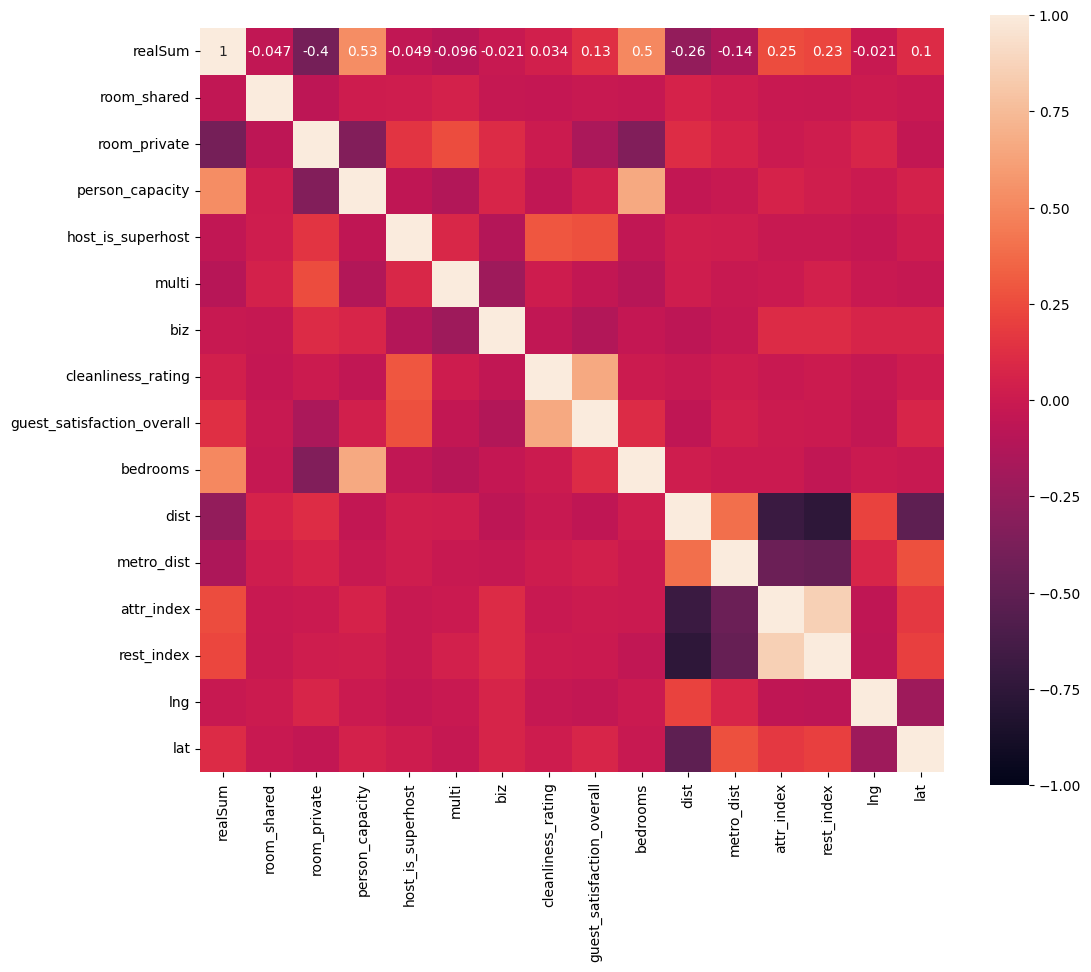

In [20]:
# -------------------------------------------------------------------------
#We start our data analysis by doing a general multivariate analysis just to quickly oversee some info

corr_matrix = df_am.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1,vmax=1, square=True, annot=True)

In [19]:
#As we can see from the correlation matrix (and as earlier predicted), the 'attr_index' and 'attr_index_norm' seem
#to be giving redundant data. The same goes for 'rest_index' and 'rest_index_norm'.
#Since this is the case, we will simply drop the normalized versions, since we cannot verify the calculations made,
#and we'd rather work with raw data

df_am = df_am.drop(['attr_index_norm'], axis=1)
df_am = df_am.drop(['rest_index_norm'], axis=1)

In [21]:
#Extra info -
count_wd = len(df_am[df_am["dataType"]=="Weekday"])
count_we = len(df_am[df_am["dataType"]=="Weekend"])

#Some important data must be known
print("~~~ DATA AMOUNT ~~~")
print("Rows of data categorized as weekend data: " +str(count_we))
print("Rows of data categorized as weekday data: " +str(count_wd))



~~~ DATA AMOUNT ~~~
Rows of data categorized as weekend data: 977
Rows of data categorized as weekday data: 1103


In [22]:
#From the correlation matrix made above, we can already make some observations based on the most glaring cells:
#   1. 'realSum' seems to be correlated to 'person_capacity' and 'bedrooms'
#   2. 'cleanliness_rating' seems to be correlated to 'guest_satisfaction_overall'
#   3. 'attr_index' and 'rest_index' seem to be correlated
#   4. 'bedrooms' and 'person_capacity' seem to be correlated
#   5. 'multi' and 'person_capacity' seem to be correlated

#We're searching to verify these affirmations in the following sections as well as complement them with other data.
#Here on out we'll be making question-answers alongside graphs which ilustrate conclusions made.

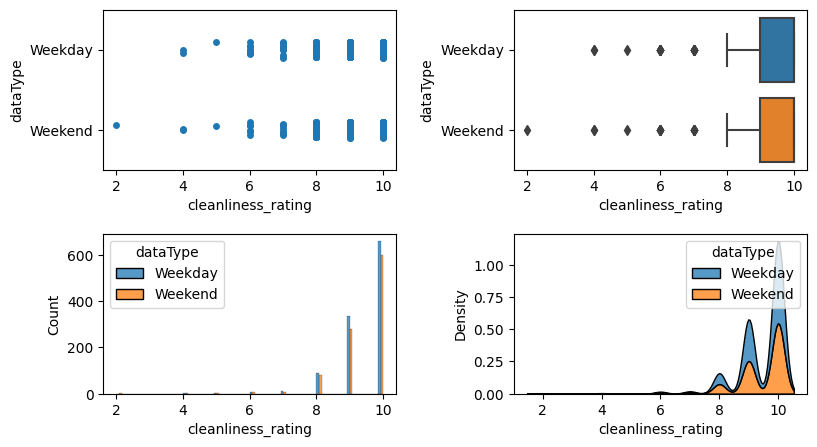

In [23]:
fig, axs = plt.subplots(2,2)

sns.stripplot(data=df_am, x="cleanliness_rating", y="dataType", ax=axs[0,0])
sns.boxplot(data=df_am, x="cleanliness_rating", y="dataType", ax=axs[0,1])
sns.histplot(data=df_am, x="cleanliness_rating", hue="dataType", multiple="dodge", ax=axs[1,0])
sns.kdeplot(df_am, x="cleanliness_rating", hue="dataType", multiple="stack", ax=axs[1,1])

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)

plt.show()


#How could one describe the cleanliness_rating distribution?
#     Majorly positive, with what seems to be a normal distribution skewed to the right. We note 75% of the 
#     distribution is rating between 9 and 10 and 50% of is exactly rated 10 for both weekend and weekday data.

#Is the cleanliness_rating higher in weekends or weekdays? 
#     There is more data in the weekdays, and it confirms the distribution skewed to the right.

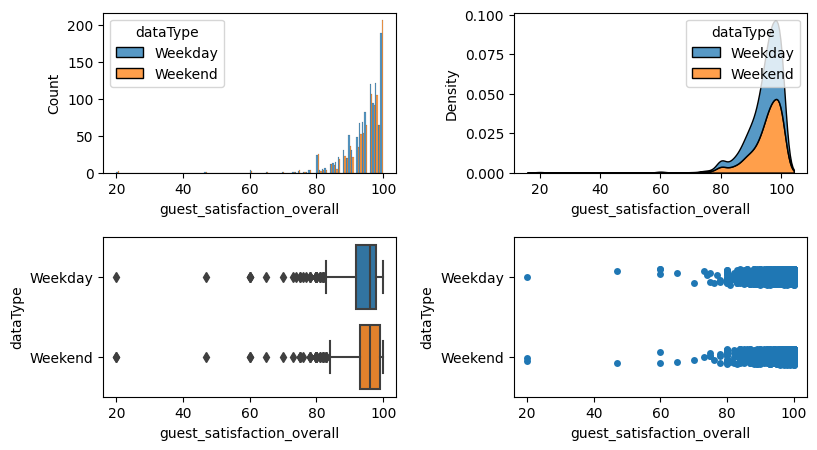

In [24]:
fig, axs = plt.subplots(2,2)

sns.histplot(data=df_am, x="guest_satisfaction_overall", hue="dataType", bins=100, multiple="dodge", ax=axs[0,0])
sns.kdeplot(df_am, x="guest_satisfaction_overall", hue="dataType", multiple="stack", ax=axs[0,1])
sns.boxplot(data=df_am, x="guest_satisfaction_overall", y="dataType", ax=axs[1,0])
sns.stripplot(data=df_am, x="guest_satisfaction_overall", y="dataType", ax=axs[1,1])

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

print()

#How could one describe the guest_satisfaction_overall distribution?
#     Alike the cleanliness_rating distribution, this one is skewed to the right, with >75% of the ratings
#     between 90 and 100 values in both weekend and weekday data. We must note that for weekend data, ratings seem
#     to be higher (third percentile is much higher in weekends than weekdays) and that weekday ratings appear to be
#     lower (minimal value is lower than on weekdays ).
#Is the cleanliness_rating higher in weekends or weekdays? 
#     There is more data in the weekdays, and it does confirm the distribution skewed to the right.

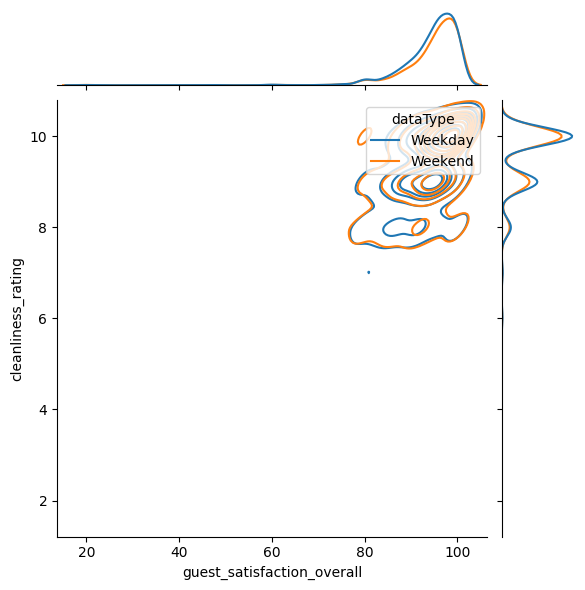

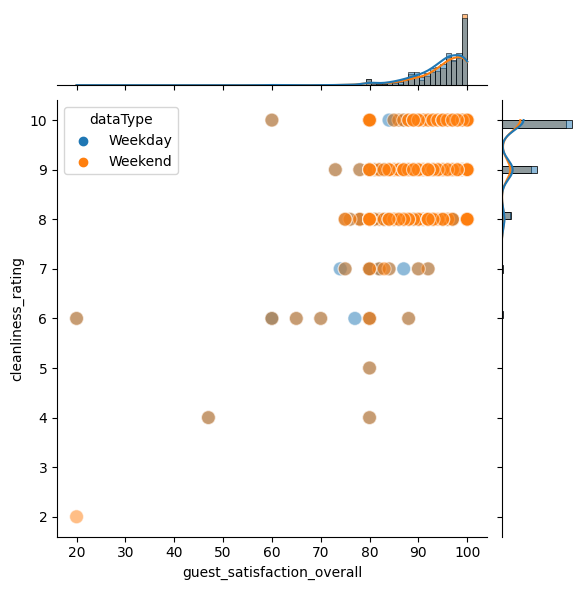

In [27]:

sns.jointplot(data=df_am, x="guest_satisfaction_overall", y="cleanliness_rating", hue="dataType", kind="kde")

g = sns.JointGrid(data=df_am, x="guest_satisfaction_overall", y="cleanliness_rating", hue="dataType")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

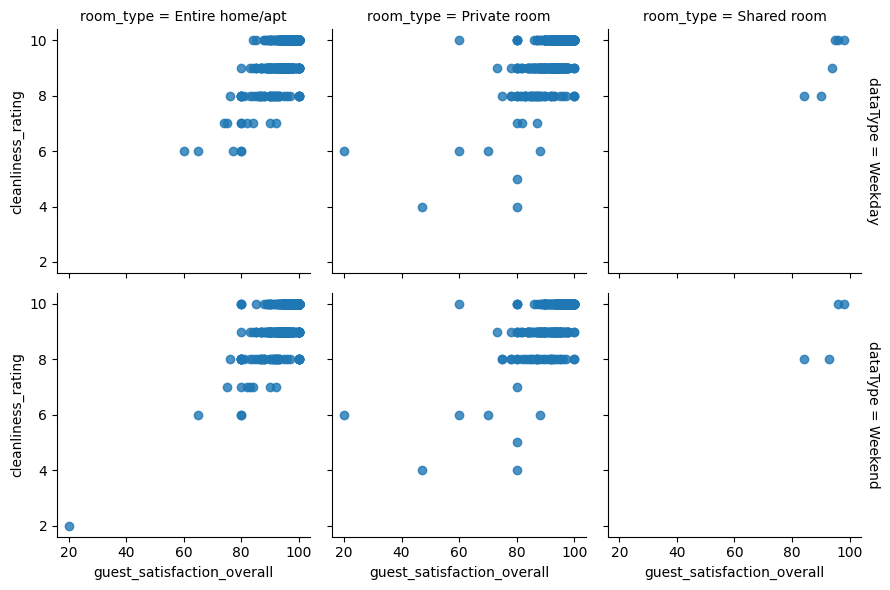

In [28]:
g = sns.FacetGrid(df_am, row="dataType", col="room_type", margin_titles=True)
g.map(sns.regplot, "guest_satisfaction_overall", "cleanliness_rating", fit_reg=False)

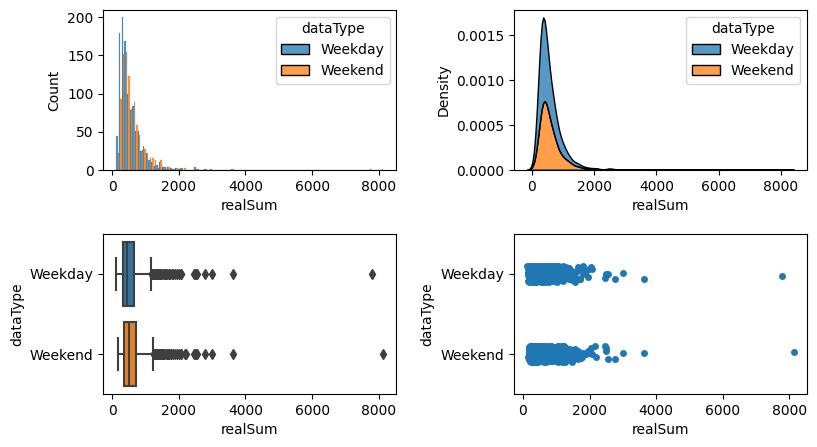

In [29]:
fig, axs = plt.subplots(2,2)

sns.histplot(data=df_am, x="realSum", hue="dataType", bins=100, multiple="dodge", ax=axs[0,0])
sns.kdeplot(df_am, x="realSum", hue="dataType", multiple="stack", ax=axs[0,1])
sns.boxplot(data=df_am, x="realSum", y="dataType", ax=axs[1,0])
sns.stripplot(data=df_am, x="realSum", y="dataType", ax=axs[1,1])

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

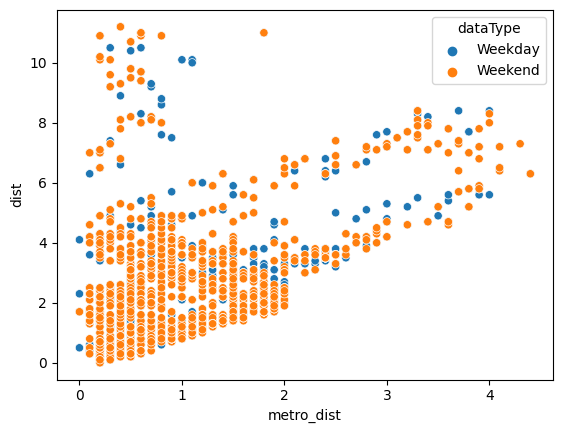

In [30]:
#g = sns.FacetGrid(df_am, col="dataType")
#g.map(sns.scatterplot, "metro_dist", "dist", alpha=.7)
#g.add_legend()

p = sns.scatterplot(data=df_am, x="metro_dist", y="dist", hue="dataType", markers=['o', 'x'])

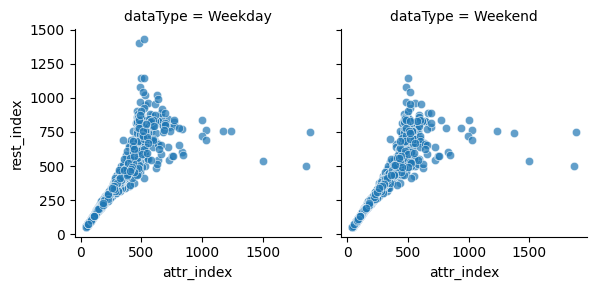

In [31]:
g = sns.FacetGrid(df_am, col="dataType")
g.map(sns.scatterplot, "attr_index", "rest_index", alpha=.7)
g.add_legend()